In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

MAE: 0.41292737516120454
R^2 Score: 0.7343696522626925


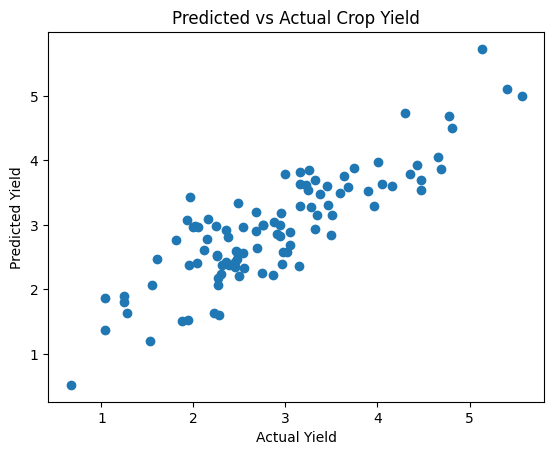

FileNotFoundError: [Errno 2] No such file or directory: 'Task 2 SmartAgri-Simple-AI-IoT/src/linear_model_yield.joblib'

In [2]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Step 2: Simulate sensor data
np.random.seed(42)
N = 500  # number of data points

soil_moisture = np.clip(np.random.normal(45, 15, N), 5, 95)  # %
temperature = np.clip(np.random.normal(25, 5, N), 10, 40)     # °C
light_intensity = np.clip(np.random.normal(300, 150, N), 50, 1000)  # lux

# Generate a simple crop yield (kg/plot) with some randomness
yield_label = 0.05*soil_moisture + 0.03*(25-temperature) + 0.002*light_intensity + np.random.normal(0,0.5,N)

# Step 3: Create DataFrame
df = pd.DataFrame({
    'Soil_Moisture': soil_moisture,
    'Temperature': temperature,
    'Light_Intensity': light_intensity,
    'Crop_Yield': yield_label
})

# Step 4: Split data
X = df[['Soil_Moisture', 'Temperature', 'Light_Intensity']]
y = df['Crop_Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Step 7: Plot predictions vs actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Predicted vs Actual Crop Yield")
plt.show()

# Step 8: Save model for inference
joblib.dump(model, "Task 2 SmartAgri-Simple-AI-IoT/src/linear_model_yield.joblib")
print("Model saved successfully!")


In [3]:
import os

# Create folder if it doesn't exist
os.makedirs("Task 2 SmartAgri-Simple-AI-IoT/src", exist_ok=True)

# Now save the model
joblib.dump(model, "Task 2 SmartAgri-Simple-AI-IoT/src/linear_model_yield.joblib")
print("Model saved successfully!")


Model saved successfully!


In [4]:
import os
import joblib

# Create folder if it doesn't exist
os.makedirs("src", exist_ok=True)

# Save the model
joblib.dump(model, "src/linear_model_yield.joblib")
print("Model saved successfully!")


Model saved successfully!
